Adapted from: https://keras.io/examples/mnist_cnn/

## Imports 

In [17]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

## Constants

In [9]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

## Download data

In [10]:
# the data, split between train and test sets
(image_train, label_train), (image_test, label_test) = mnist.load_data()

## Formating data

In [11]:
# Putting data_format to 
# channel_first, you say that for every layer your tensor will have this shape: 
# (batch, channels, height, width), 
# but for channel_last you gonna have (batch, height, width, channels).
if K.image_data_format() == 'channels_first':
    image_train = image_train.reshape(image_train.shape[0], 1, img_rows, img_cols)
    image_test = image_test.reshape(image_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    image_train = image_train.reshape(image_train.shape[0], img_rows, img_cols, 1)
    image_test = image_test.reshape(image_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

image_train = image_train.astype('float32')
image_test = image_test.astype('float32')
image_train /= 255
image_test /= 255
print('image_train shape:', image_train.shape)
print(image_train.shape[0], 'train samples')
print(image_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
label_train = keras.utils.to_categorical(label_train, num_classes)
label_test = keras.utils.to_categorical(label_test, num_classes)

image_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
# Uncomment the next line to see how data looks like
# print(image_train[0])

## Defining neural network

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Training neural network

In [17]:
model.fit(image_train, label_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(image_test, label_test))
# evaluate the model
score = model.evaluate(image_test, label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 276s 5ms/step - loss: 0.2642 - accuracy: 0.9184 - val_loss: 0.0626 - val_accuracy: 0.9804
Epoch 2/12
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0918 - accuracy: 0.9729 - val_loss: 0.0401 - val_accuracy: 0.9858
Epoch 3/12
60000/60000 [==============================] - 280s 5ms/step - loss: 0.0681 - accuracy: 0.9807 - val_loss: 0.0338 - val_accuracy: 0.9884
Epoch 4/12
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0328 - val_accuracy: 0.9885
Epoch 5/12
60000/60000 [==============================] - 293s 5ms/step - loss: 0.0483 - accuracy: 0.9858 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 6/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 7/12
60000/60000 [==============================] - 240s

## Saving model

In [19]:
model.save("mnistModel.h5")

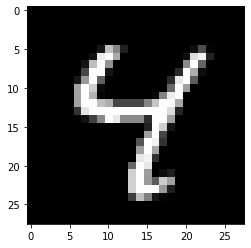

In [18]:
predict = model.predict(image_test[16:7])

plt.imshow(image_test[6].reshape(28, 28), cmap='gray')